## import lib yg diperlukan

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import seaborn as sns


## Masukan data MNIST dari KERAS

In [96]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [97]:
type(X_train)

numpy.ndarray

In [98]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Training dan testing data

Training data = 60,000 gambar <br>
Test data = 10,000 gambar

In [99]:
# Print data ke-10

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [100]:
print(X_train[10].shape)

(28, 28)


2


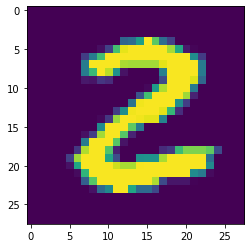

In [101]:
# Tampilkan gambar

plt.imshow(X_train[25])
plt.show

print(Y_train[25])

In [102]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [103]:
# Nilai unik di Y_train
print(np.unique(Y_train))

# Nilai unik di Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## One Hot Encoding

In [104]:
# Skala nilai
X_train = X_train / 255
X_test = X_test / 255

In [105]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Membangun CNN

In [106]:
# atur layer dari Neural Network

model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(50, activation='relu'),
                            keras.layers.Dense(50, activation='relu'),
                            keras.layers.Dense(10, activation='sigmoid') # output layer
])

In [107]:
# komiple CNN

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [108]:
# latih CNN

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

Akurasi data = 98%

## Test akurasi data test

In [109]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Akurasi data test: ",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9710
Akurasi data test:  0.9710000157356262


In [110]:
print(X_test.shape)

(10000, 28, 28)


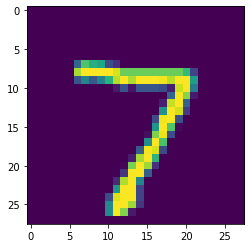

Ini adalah:  7


In [111]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()
print("Ini adalah: ",Y_test[0])

In [112]:
print(Y_test[0])

7


In [113]:
Y_pred = model.predict(X_test)

In [114]:
print(Y_pred.shape)

(10000, 10)


In [115]:
print(Y_pred[0])

[3.5130084e-03 6.7106444e-01 6.6638464e-01 8.5868883e-01 6.2501094e-05
 9.0813637e-04 4.0907306e-08 9.9999774e-01 1.3417095e-02 6.5949798e-02]


Model.predict() berdampak kemungkinan prediksi class daru

In [116]:
label_test_gambar_pertama = np.argmax(Y_pred[0])
print("prediksi gambar",label_test_gambar_pertama)

prediksi gambar 7


In [117]:
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [118]:
print(Y_pred)

[[3.5130084e-03 6.7106444e-01 6.6638464e-01 ... 9.9999774e-01
  1.3417095e-02 6.5949798e-02]
 [1.4623702e-03 9.8551810e-01 9.9999803e-01 ... 8.7179070e-10
  9.9594283e-01 2.8698874e-09]
 [3.2803416e-04 9.9889880e-01 1.9822419e-02 ... 1.7416507e-02
  8.2349467e-01 3.1207800e-03]
 ...
 [7.6076623e-07 2.1074546e-05 1.1165320e-04 ... 5.3507298e-02
  2.6697814e-03 5.0617886e-01]
 [3.9582705e-05 3.1402707e-04 3.5408437e-03 ... 6.9005787e-03
  9.9133873e-01 6.4516068e-04]
 [1.0095924e-02 1.2965620e-02 4.6259880e-02 ... 3.3845839e-07
  1.4659762e-04 5.2905436e-10]]


Y_test --> label
Y_pred --> predict label

## Membangun Confusion Matrik

In [119]:
conf_mat = confusion_matrix(Y_test, Y_pred_label)

In [120]:
print(conf_mat)

tf.Tensor(
[[ 969    1    1    0    1    1    2    2    3    0]
 [   0 1122    1    2    0    4    2    0    4    0]
 [   5    0  999    1    7    1    2    6   11    0]
 [   0    0    5  966    0   23    0    3    7    6]
 [   0    0    2    0  968    1    4    2    1    4]
 [   2    0    0    4    2  878    4    1    1    0]
 [   6    1    0    0    8   11  929    0    3    0]
 [   1    5    9    0    5    0    0  994    8    6]
 [   2    0    3    6    6   10    2    2  943    0]
 [   3    4    0    8   24   10    1    7   10  942]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'label prediksi')

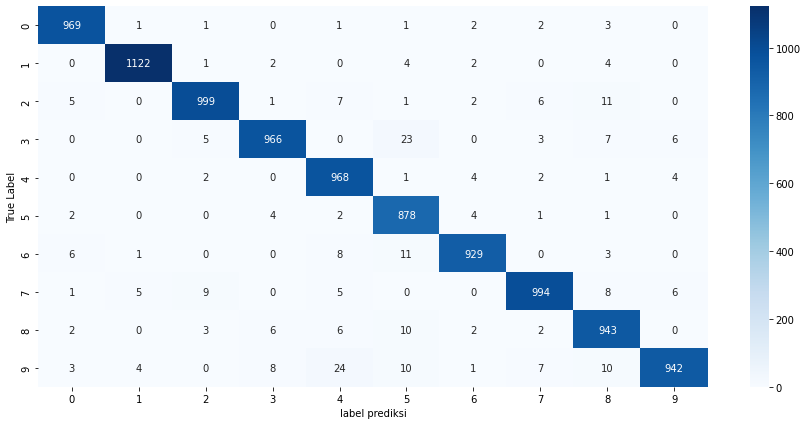

In [121]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('label prediksi')

## Membangun sistem prediksi

In [122]:
lokasi_gambar = '/content/empat.png'


gambar = cv2.imread(lokasi_gambar)

In [123]:
type(gambar)

numpy.ndarray

In [124]:
print(gambar)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [125]:
cv2_imshow(gambar)

In [126]:
gambar.shape

(28, 28, 3)

In [127]:
ubah_warna = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)

In [128]:
ubah_warna.shape

(28, 28)

In [129]:
gambar_dikurangi = cv2.resize(ubah_warna, (28, 28))

In [130]:
gambar_dikurangi.shape

(28, 28)

In [131]:
cv2_imshow(gambar_dikurangi)

In [132]:
gambar_dikurangi = gambar_dikurangi/255

In [133]:
gambar_reshape = np.reshape(gambar_dikurangi, [1,28,28])

In [134]:
prediksi_gambar = model.predict(gambar_reshape)
print(prediksi_gambar)

[[9.2387063e-06 4.4995546e-04 6.3648820e-04 2.5216616e-06 9.9999917e-01
  4.8007965e-03 9.1512578e-05 4.2762026e-01 1.7942497e-06 1.3301611e-02]]


In [135]:
prediksi_gambar_label = np.argmax(prediksi_gambar)

In [136]:
print(prediksi_gambar_label)

4


## Sistem prediksi tulisan tangan

In [138]:
input_lokasi_gambar = input('Lokasi gambar yg akan di prediksi')


input_gambar = cv2.imread(input_lokasi_gambar)


cv2_imshow(input_gambar)


ubah_warna = cv2.cvtColor(input_gambar, cv2.COLOR_RGB2GRAY)

input_gambar_dikurangi = cv2.resize(ubah_warna, (28, 28))

input_gambar_dikurangi = input_gambar_dikurangi/255

input_gambar_reshape = np.reshape(input_gambar_dikurangi, [1,28,28])

input_prediksi_gambar = model.predict(input_gambar_reshape)

input_prediksi_gambar_label = np.argmax(input_prediksi_gambar)

print('Prediksi tulisan tangan adalah: ', input_prediksi_gambar_label)

Lokasi gambar yg akan di prediksi/content/delapan.png


Prediksi tulisan tangan adalah:  8
